#  分类树

In [ ]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
wine.data.shape

(178, 13)

In [5]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [7]:
#实例化
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
#训练
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
#预测
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print('Single Tree:{}'.format(score_c),
     'Random Forest:{}'.format(score_r))

Single Tree:0.9444444444444444 Random Forest:1.0


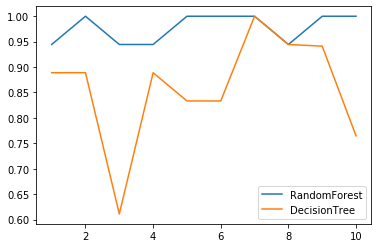

In [9]:
#交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='DecisionTree')
plt.legend()
plt.show()

###  n_estimators的学习曲线

0.9944444444444445 32


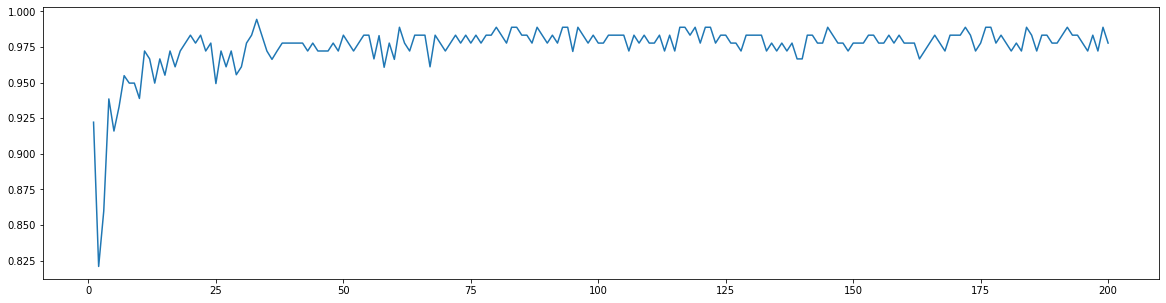

In [10]:
superna = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superna.append(rfc_s)
print(max(superna),superna.index(max(superna)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superna)
plt.show()

 ###  重要参数和接口


random_state 控制生成森林的模式。 固定时，随机森林中生成的是一组固定的树，但每棵树是不一致的，这体现了用‘随机挑选特征进行分枝’的方法的随机性。这种随机性越大的时候，bagging的效果一般会越好。

bootstrap 控制抽样技术的参数。默认True，代表采用有放回的随机抽样技术，且我们一般不会设置成False。

oob_score_ 表示使用袋外数据作为测试集，此时无需划分训练集和测试集

In [12]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [13]:
rfc.oob_score_ #查看使用袋外数据测试的得分

0.9775280898876404

In [14]:
rfc.estimators_ #查看每棵树的参数情况

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1348781956, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=70047681, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

#   Bagging的必要条件

1、使用bagging时要求基评估器要尽量独立。

2、基分类器的判断准确率至少要超过50%。

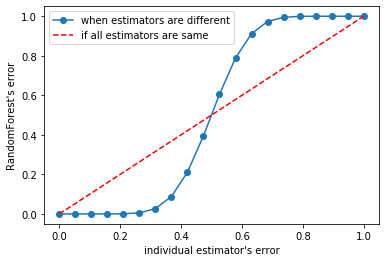

In [17]:
import numpy as np
from scipy.special import comb

x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x,y,'o-',label='when estimators are different')
plt.plot(x,x,'--',color='red',label='if all estimators are same')
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

分析图像可得，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反集成算法会失效。所以在使用随机森林之前，一定要检查用来组成随机森林的分类树们是否至少都有50%的正确率

#  回归树

###  重要参数，属性与接口

除了比决策树多了个n_estimators 其余一致

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [21]:
boston = load_boston()

In [23]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [24]:
#sklearn当中的模型评估指标列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 实例: 用随机森林回归填补缺失值

使用sklearn.impute.SimpleImputer来填补缺失值

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补缺失值的类
from sklearn.ensemble import RandomForestRegressor

In [26]:
dataset = load_boston()

X_full,Y_full = dataset.data,dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [32]:
dataset.data.shape

(506, 13)

In [28]:
#为完整数据集放入缺失值
#首先确定我们希望放入的缺失数据的比例，这里假设50%
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))
#np.floor向下取整，返回.0格式的浮点数
n_missing_samples

3289

In [29]:
#所有数据要随机遍布在数据集的各个位置中，而一个缺失的数据会需要一个行索引和列索引
#创造一个数组，包含3289个分布在0-506中间的行索引，3289个分布在0-13之间的列索引
#利用 数组中的索引为数据中的任意3289个位置赋空值
#然后用0、均值和随机森林来填写这些缺失值
missing_features = rng.randint(0,n_features,n_missing_samples)
#randint(下限，上限，个数) 在下限和上限之间取出n个整数
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [33]:
X_missing = X_full.copy()
Y_missing = Y_full.copy()

In [34]:
X_missing[missing_samples,missing_features] = np.nan

In [43]:
X_missing = pd.DataFrame(X_missing)
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [37]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)#训练+导出
X_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

In [40]:
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [42]:
sortindex = np.argsort(X_missing.isnull().sum(axis=0)).values

In [45]:
for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(Y_full)],axis=1)
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    #使用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    #将填补好的缺失值写入到特征矩阵中
    X_missing.loc[X_missing.iloc[:,i].isnull(),i] = Ypredict

In [47]:
pd.DataFrame(X_missing).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64